Connect google drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
video_path = "/content/drive/MyDrive/Harry Potter and the Sorcerer's Stone (2001) Official Trailer - Daniel Radcliffe Movie HD.mp4"
output_folder = "/content/drive/MyDrive/Extracted_Frames"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)


Extracted: /content/drive/MyDrive/Extracted_Frames/frame_q1.jpg


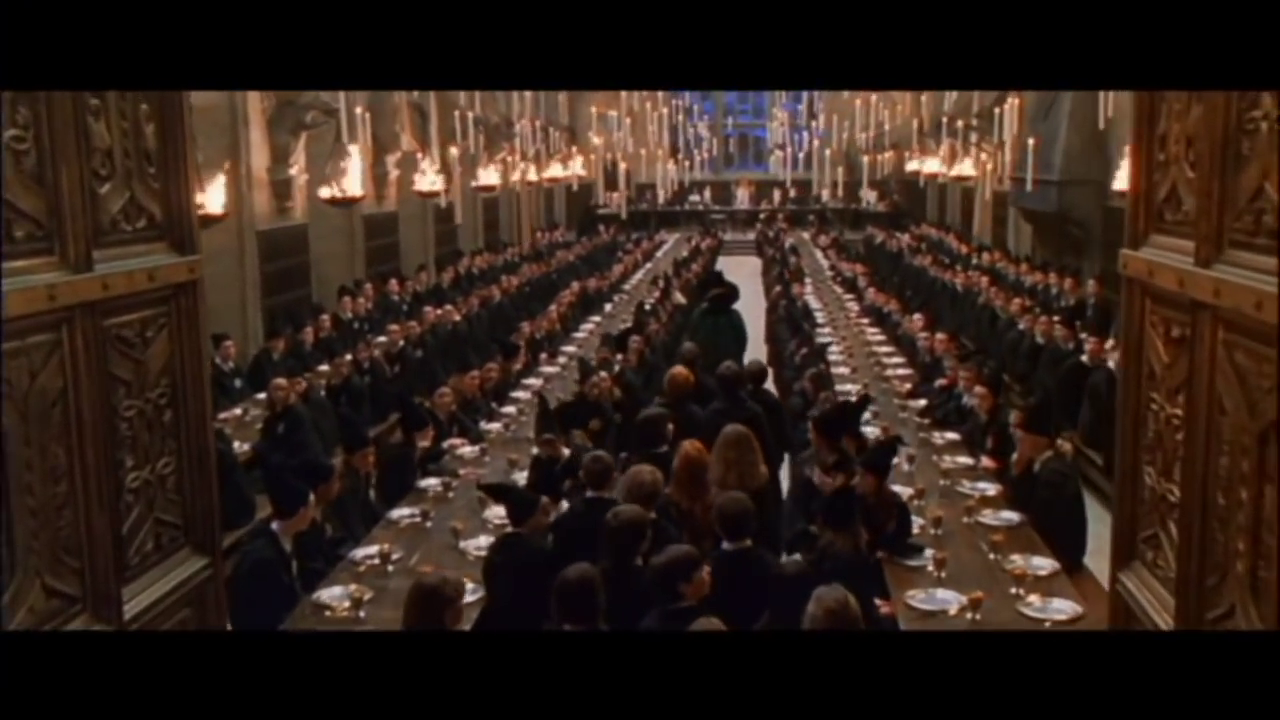

Extracted: /content/drive/MyDrive/Extracted_Frames/frame_q2.jpg


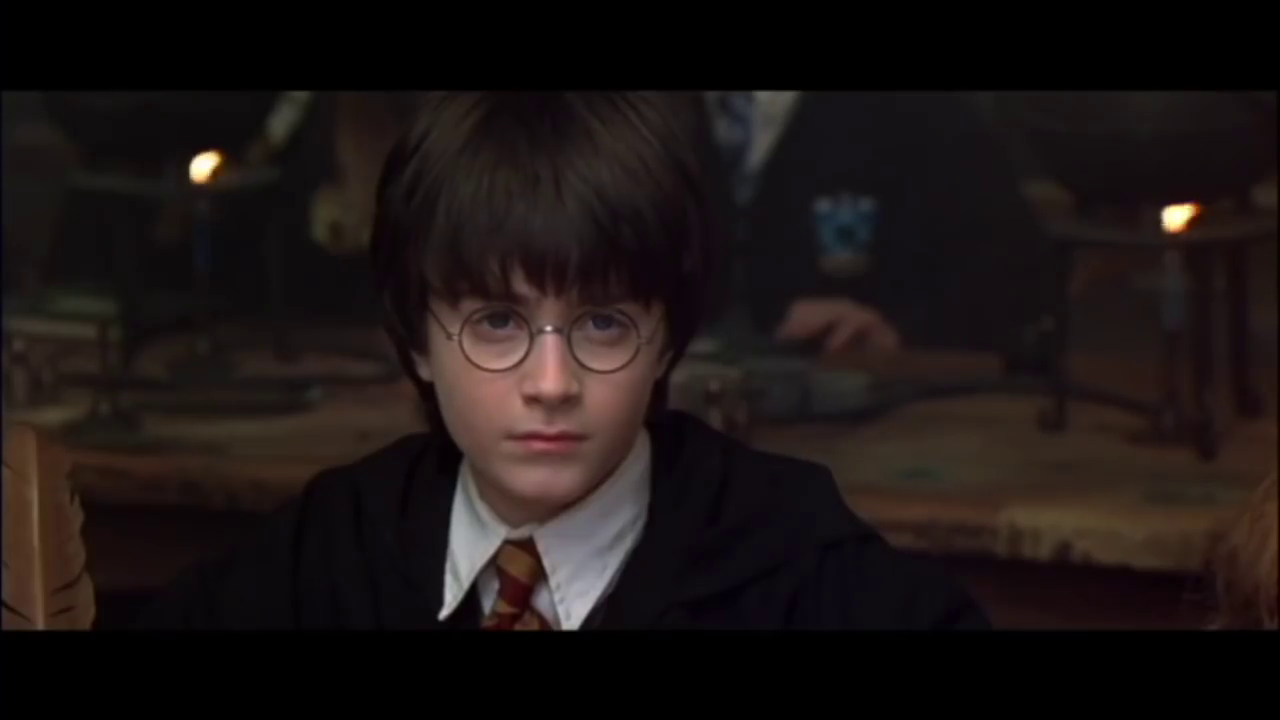

Extracted: /content/drive/MyDrive/Extracted_Frames/frame_q3.jpg


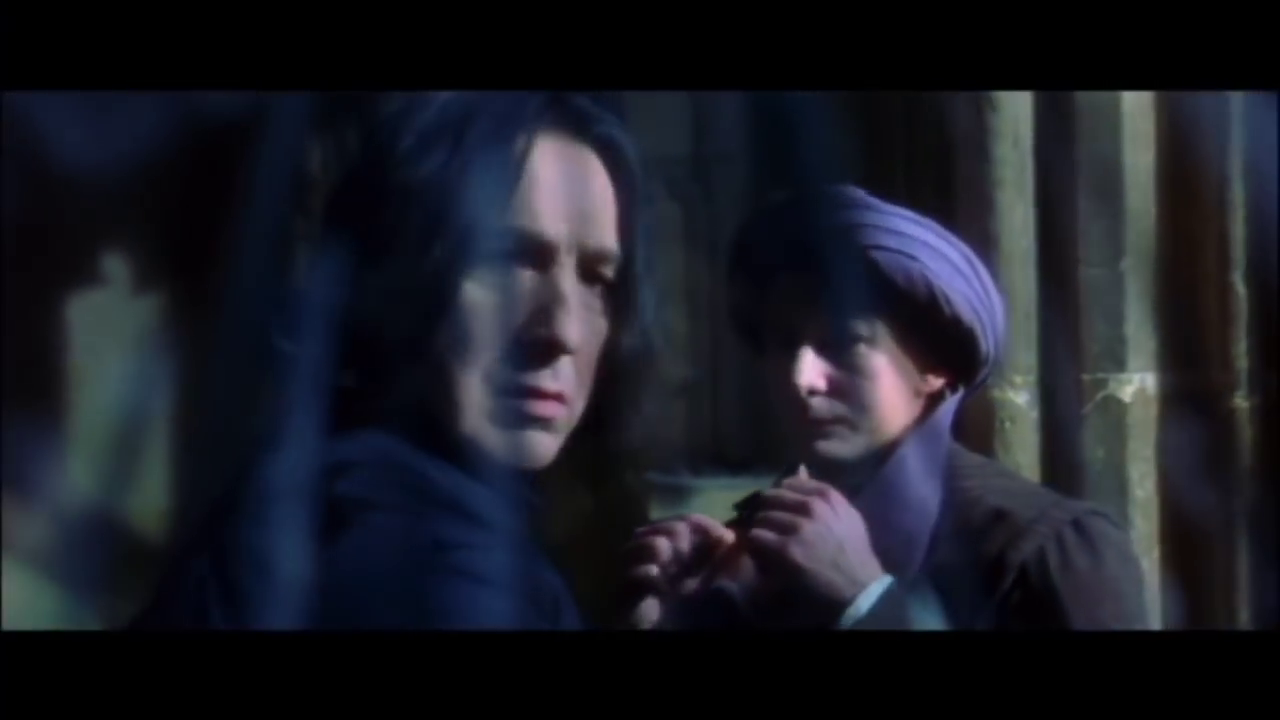

Extracted: /content/drive/MyDrive/Extracted_Frames/frame_q4.jpg


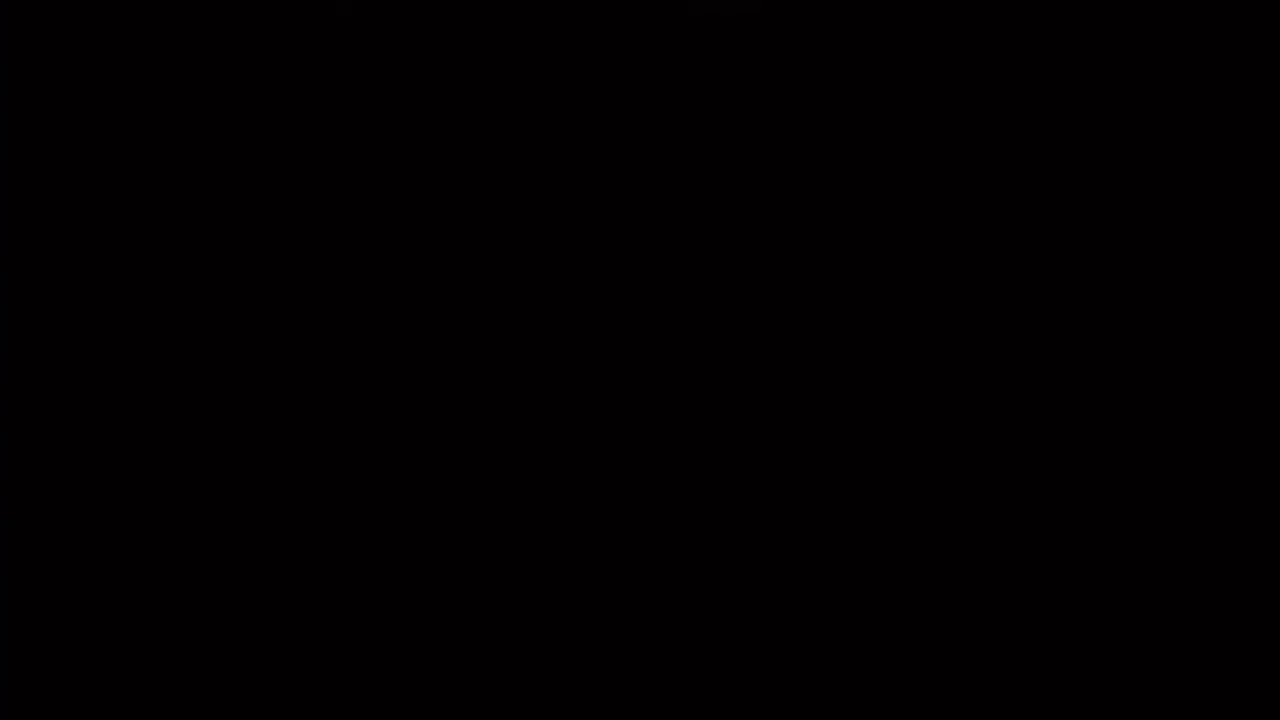

In [ ]:
def extract_quarter_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    quarter_frames = [int(total_frames * 0.25), int(total_frames * 0.50),
                      int(total_frames * 0.75), total_frames - 1]

    extracted_frames = []

    for idx, frame_no in enumerate(quarter_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()

        if ret:
            frame_filename = f"frame_q{idx+1}.jpg"
            frame_path = os.path.join(output_folder, frame_filename)

            cv2.imwrite(frame_path, frame)
            extracted_frames.append(frame_path)

            print(f"Extracted: {frame_path}")
            cv2_imshow(frame)

    cap.release()

extract_quarter_frames(video_path, output_folder)


In [ ]:
files = os.listdir(output_folder)
print("Extracted Frames:", files)

Extracted Frames: ['frame_q1.jpg', 'frame_q2.jpg', 'frame_q3.jpg', 'frame_q4.jpg']
